In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from utils import load, dump
from evaluate import eval, Evaluator
from os import getcwd
from tqdm import tqdm
import torch

root = f'{getcwd()}/..'
path = lambda p: f'{root}/../out/{p}'

In [2]:
testset = load(f'{root}/data/prd_backtick-se_cowait_annotated.json')

def evaluate(predict):    
    y_true = []
    y_pred = []

    for pr in tqdm(testset):
        title = pr['title']
        pcat = predict(title)
        tcat = pr['category']

        y_true.append(tcat)
        y_pred.append(pcat)
    
    eval(y_true, y_pred)

def progress(model):
    ev = Evaluator(path(model))
    ev.plot_progress()
    evaluate(ev.predict)

def compare(*models):
    model_files = [*map(path, models)]
    evaluators = [*map(Evaluator, model_files)]
    Evaluator.compare(*evaluators)

## Let's evaluate the transformer classifiers

### Frozen baseline results for each architecture
DistilBERT and CodeBERTa showing best base config results

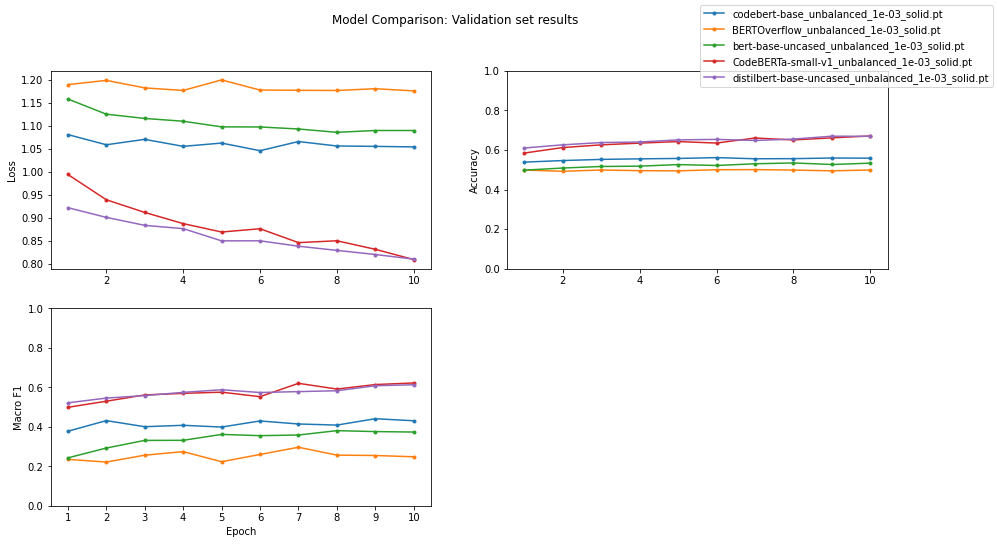

In [3]:
compare(
    'codebert-base_unbalanced_1e-03_solid.pt',
    'BERTOverflow_unbalanced_1e-03_solid.pt',
    'bert-base-uncased_unbalanced_1e-03_solid.pt',
    'CodeBERTa-small-v1_unbalanced_1e-03_solid.pt',
    'distilbert-base-uncased_unbalanced_1e-03_solid.pt',
)

### Balanced VS unbalanced training data

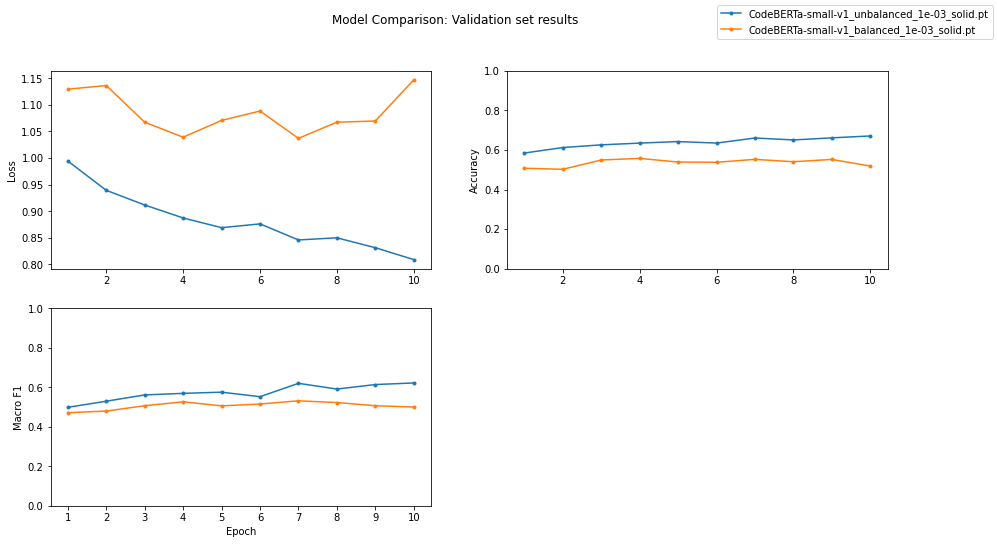

In [4]:
compare(
    'CodeBERTa-small-v1_unbalanced_1e-03_solid.pt',
    'CodeBERTa-small-v1_balanced_1e-03_solid.pt',
)

### Thaw impact CodeBERTa
Unfreezing one layer seems to do wonders, any more than that increases the loss dramatically.

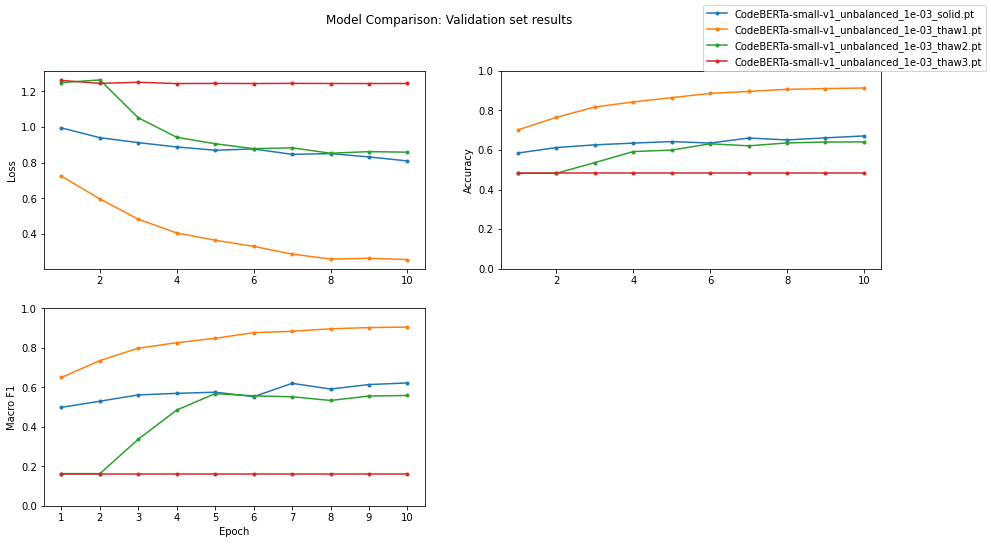

In [5]:
compare(
    'CodeBERTa-small-v1_unbalanced_1e-03_solid.pt',
    'CodeBERTa-small-v1_unbalanced_1e-03_thaw1.pt',
    'CodeBERTa-small-v1_unbalanced_1e-03_thaw2.pt',
    'CodeBERTa-small-v1_unbalanced_1e-03_thaw3.pt',
)

### Thaw impact DistilBERT
Unfreezing a couple of layers seems to decrease loss segnificantly

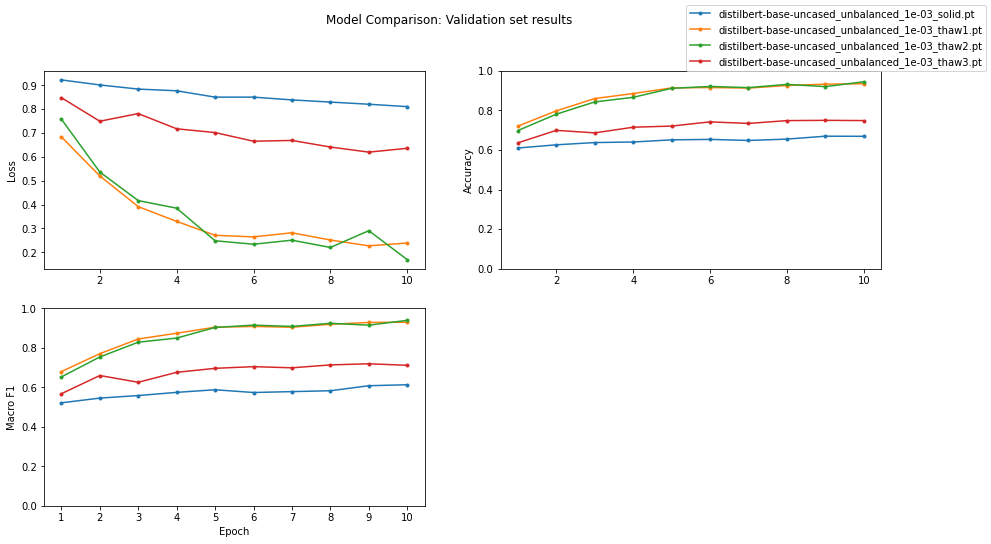

In [6]:
compare(
    'distilbert-base-uncased_unbalanced_1e-03_solid.pt',
    'distilbert-base-uncased_unbalanced_1e-03_thaw1.pt',
    'distilbert-base-uncased_unbalanced_1e-03_thaw2.pt',
    'distilbert-base-uncased_unbalanced_1e-03_thaw3.pt',
)

### DistilBERT t2 vs CodeBERTA t1

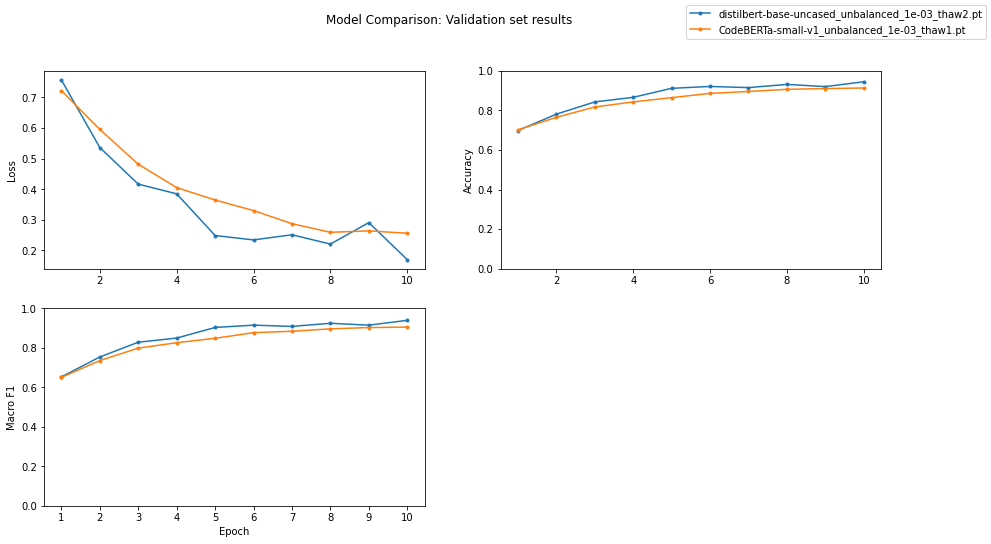

In [8]:
compare('distilbert-base-uncased_unbalanced_1e-03_thaw2.pt', 'CodeBERTa-small-v1_unbalanced_1e-03_thaw1.pt',)

## BEST YET

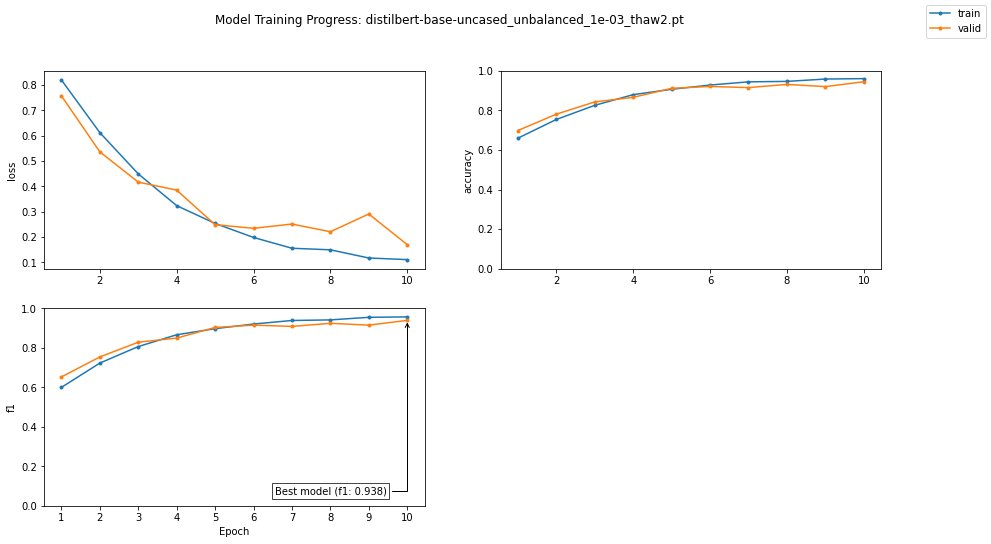

100%|██████████| 180/180 [00:05<00:00, 32.30it/s]

                precision    recall  f1-score   support

      fix-bugs       0.41      0.84      0.55        32
  new-features       0.42      0.27      0.33        49
 documentation       0.36      0.62      0.45         8
non-functional       0.67      0.51      0.58        91

      accuracy                           0.51       180
     macro avg       0.46      0.56      0.48       180
  weighted avg       0.54      0.51      0.50       180

[[27  1  1  3]
 [15 13  3 18]
 [ 0  1  5  2]
 [24 16  5 46]]


In [3]:
progress('distilbert-base-uncased_unbalanced_1e-03_thaw2.pt')